In [1]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix


import statsmodels.api as sm


In [2]:
data = pd.read_csv('final_with_covid_AS.csv')


# car driver

In [3]:
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October    

In [11]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
               
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   
                   'CovidPrd']]




y = filtered_data['Hsptlsns']



x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 6.33521191869523
MAE: 3.6853641033285376
R^2: 0.816322146127802


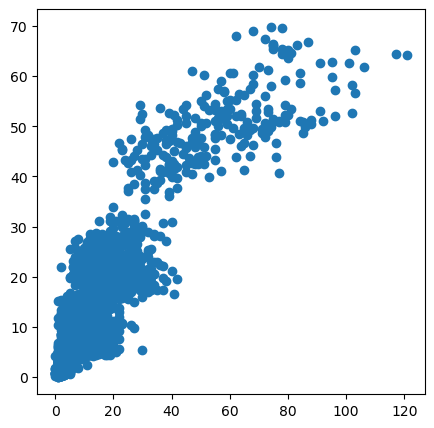

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

In [13]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 4.675933170433554
MAE: 2.986738322262923
R^2: 0.7574628072119434


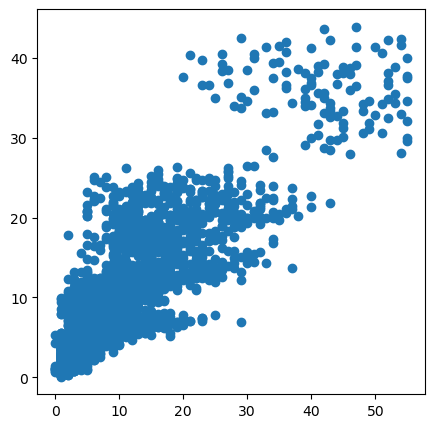

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

In [15]:
count_zeros = pd.Series(y).value_counts().get(0, 0)

print("تعداد صفرها در y:", count_zeros)

تعداد صفرها در y: 28


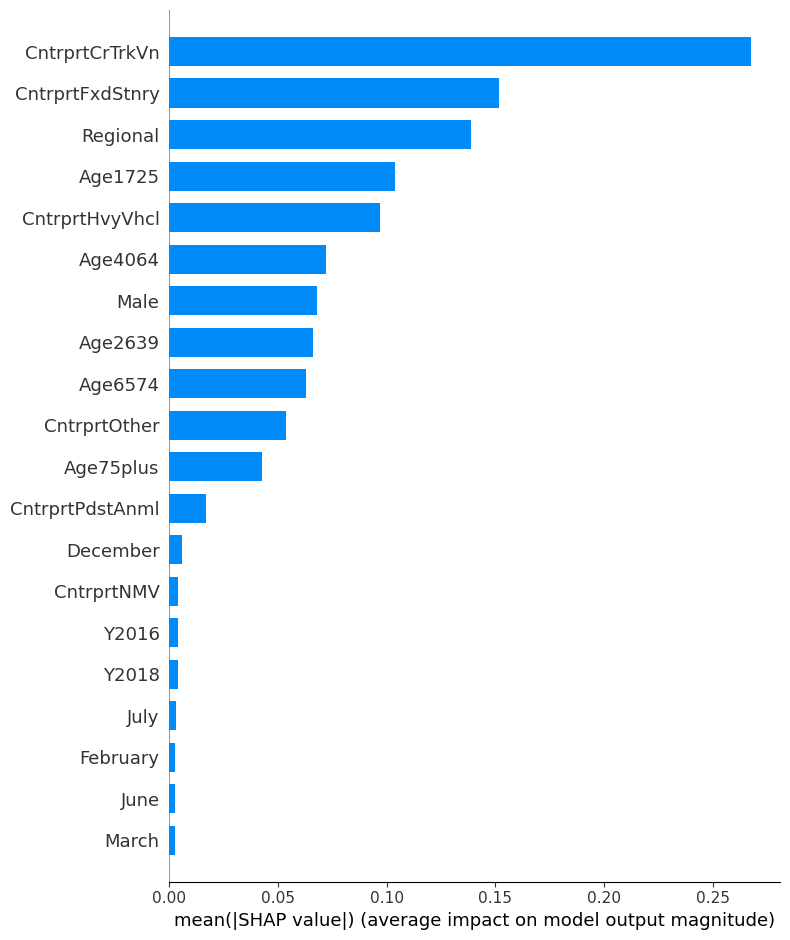

In [10]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                         Feature  Mean SHAP Value
CntrprtHvyVhcl    CntrprtHvyVhcl         0.143257
Regional                Regional         0.119379
Age1725                  Age1725         0.103247
CntrprtOther        CntrprtOther         0.072883
Male                        Male         0.071524
CntrprtNClsn        CntrprtNClsn         0.067551
Age2639                  Age2639         0.058445
Age6574                  Age6574         0.054802
CntrprtFxdStnry  CntrprtFxdStnry         0.052401
Age4064                  Age4064         0.052066


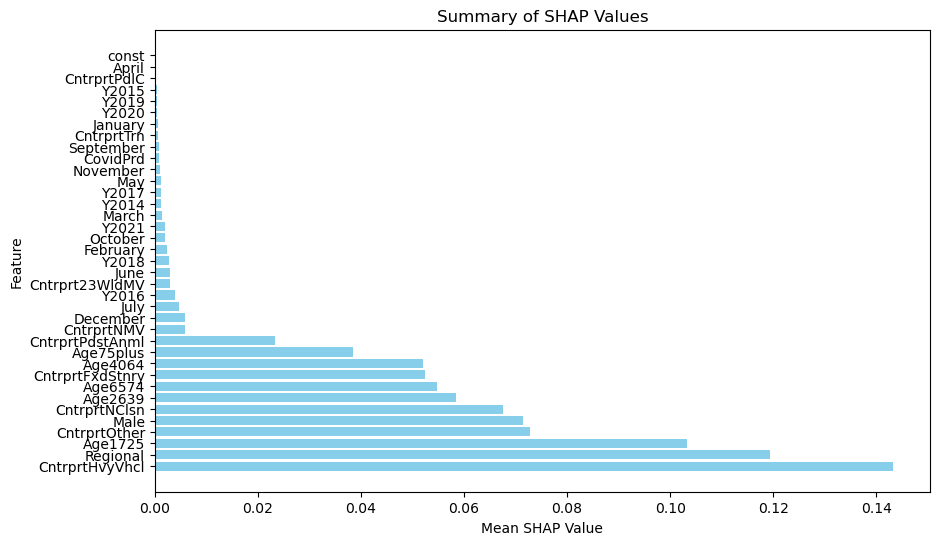

In [12]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


# car passanger

In [17]:
filtered_data2 = data[data['CarPngr'] == 1]

In [18]:
X = filtered_data2[['Age07','Age816','Age1725','Age2639','Age4064','Age6574',
                    'Female',
                    'Regional',
               
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   
                   'CovidPrd']] 
y = filtered_data2['Hsptlsns']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 2.859022553539719
MAE: 1.839487378126194
R^2: 0.6490022362767643


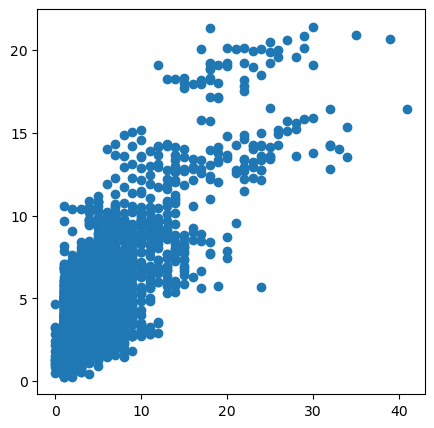

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

In [20]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 2.3435873498244377
MAE: 1.6560115969576725
R^2: 0.534587421040751


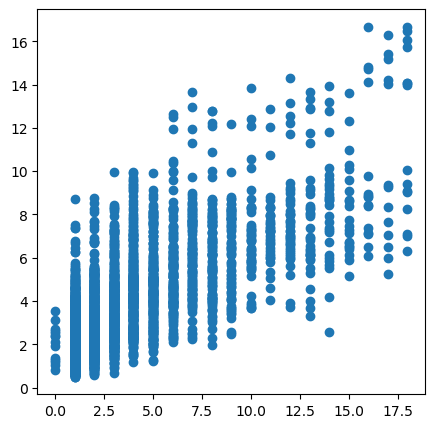

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

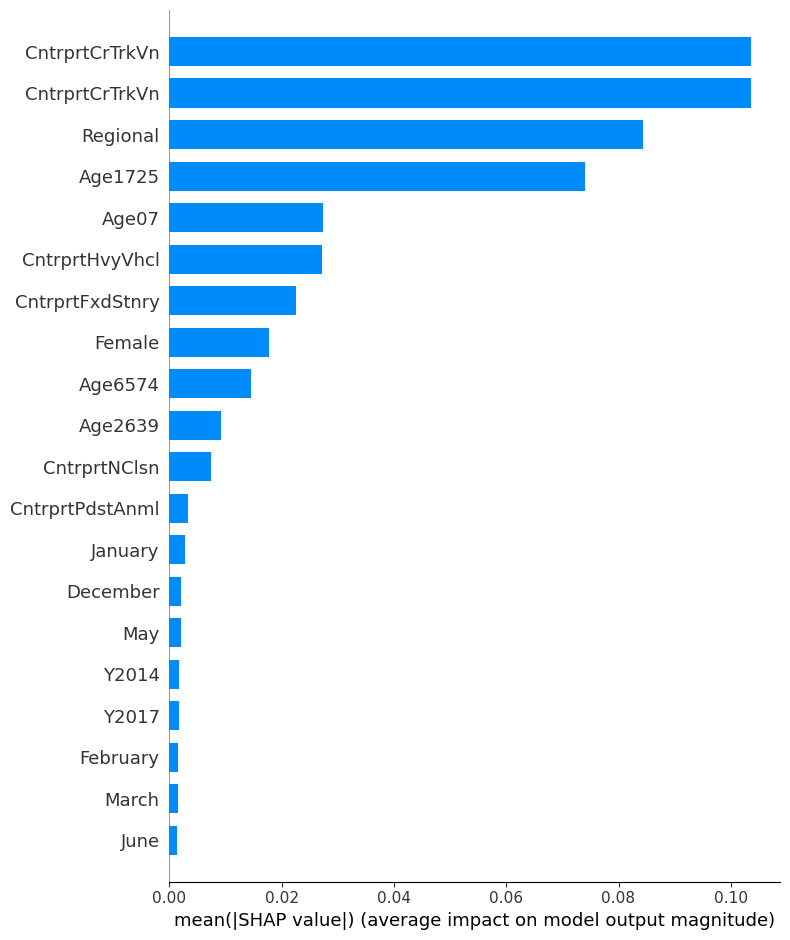

In [22]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                         Feature  Mean SHAP Value
CntrprtCrTrkVn    CntrprtCrTrkVn         0.145735
Regional                Regional         0.082049
Age1725                  Age1725         0.072608
CntrprtHvyVhcl    CntrprtHvyVhcl         0.030525
Age07                      Age07         0.026602
Female                    Female         0.014816
Age6574                  Age6574         0.013847
CntrprtFxdStnry  CntrprtFxdStnry         0.010379
Age2639                  Age2639         0.008359
CntrprtNClsn        CntrprtNClsn         0.006819


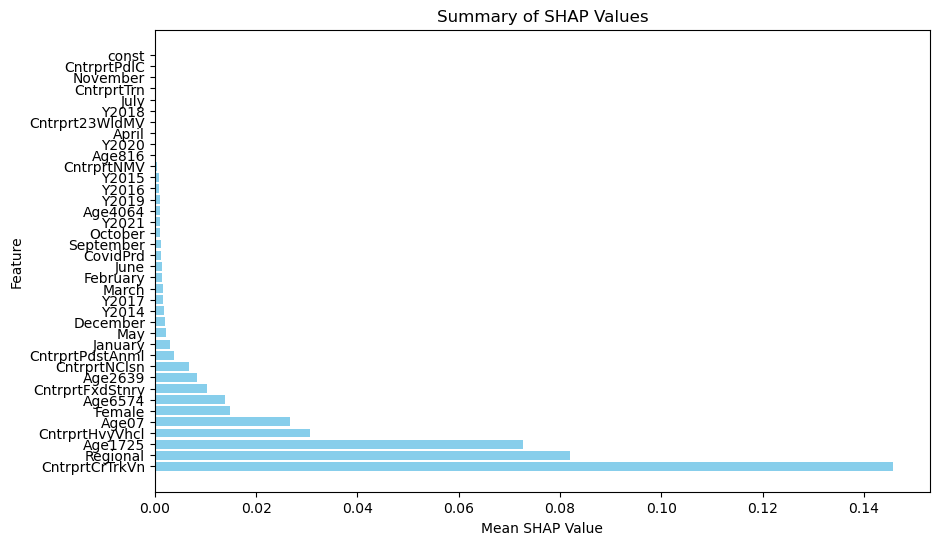

In [27]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


# Mtrcyclist REGRESION

In [28]:
filtered_data3 = data[data['Mtrcyclist'] == 1]
filtered_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11227 entries, 3 to 54034
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11227 non-null  int64  
 1   BedDys           11227 non-null  int64  
 2   BeddystoCC       11227 non-null  float64
 3   Severity         11227 non-null  int64  
 4   DiedCases        11227 non-null  int64  
 5   DiedBdDys        11227 non-null  int64  
 6   Hsptlsns         11227 non-null  int64  
 7   April            11227 non-null  int64  
 8   August           11227 non-null  int64  
 9   December         11227 non-null  int64  
 10  February         11227 non-null  int64  
 11  January          11227 non-null  int64  
 12  July             11227 non-null  int64  
 13  June             11227 non-null  int64  
 14  March            11227 non-null  int64  
 15  May              11227 non-null  int64  
 16  November         11227 non-null  int64  
 17  October     

In [29]:
X = filtered_data3[['Age1725','Age2639','Age4064',
                    
                    'Male',
                    
                    'Regional',
               
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtCrTrkVn','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021']]

y = filtered_data3['Hsptlsns']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 4.393004496250238
MAE: 2.654812824985642
R^2: 0.8769182787436927


In [30]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 3.6497765941168594
MAE: 2.316410351327076
R^2: 0.8280228665069826


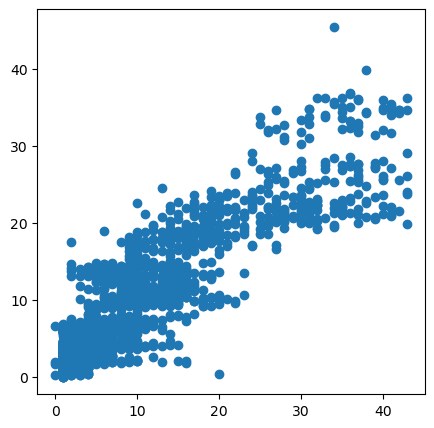

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

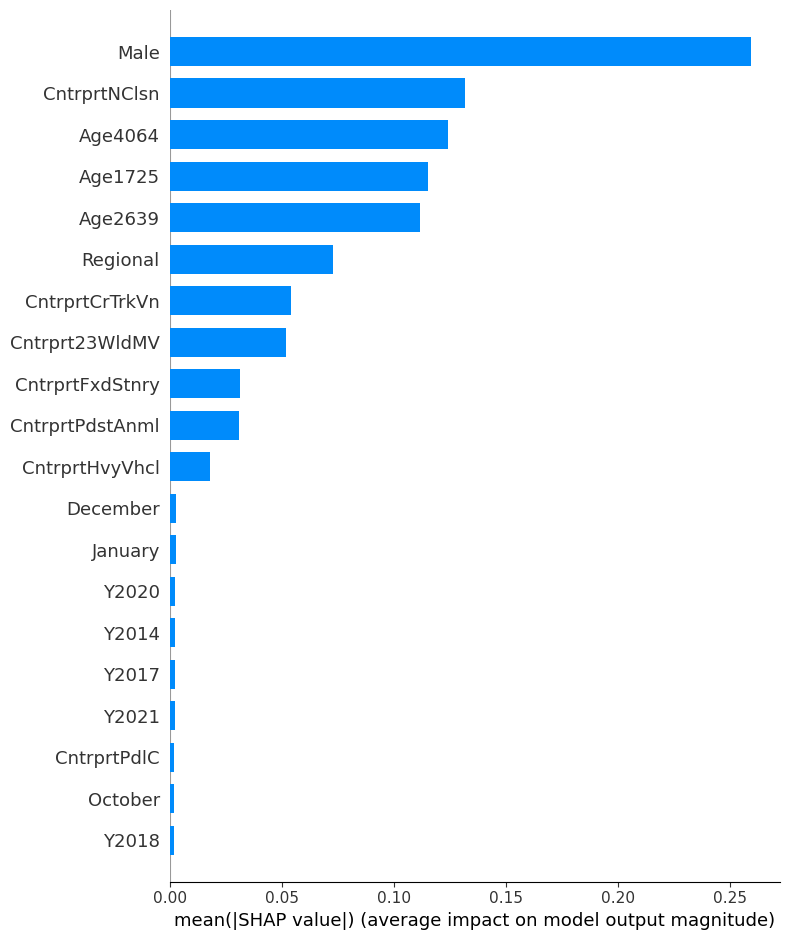

In [32]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                         Feature  Mean SHAP Value
Male                        Male         0.259347
CntrprtNClsn        CntrprtNClsn         0.131756
Age4064                  Age4064         0.124411
Age1725                  Age1725         0.115072
Age2639                  Age2639         0.111516
Regional                Regional         0.072716
CntrprtCrTrkVn    CntrprtCrTrkVn         0.054079
Cntrprt23WldMV    Cntrprt23WldMV         0.051767
CntrprtFxdStnry  CntrprtFxdStnry         0.031461
CntrprtPdstAnml  CntrprtPdstAnml         0.030891


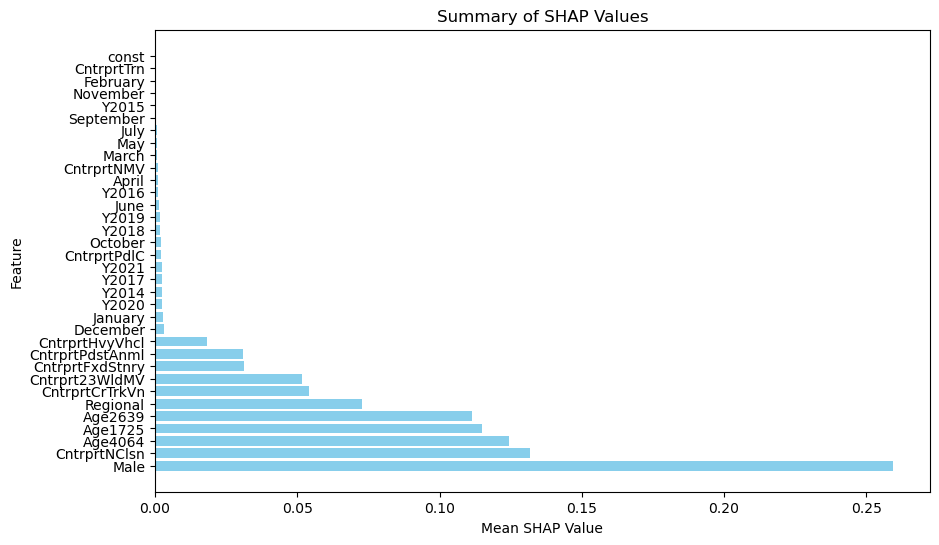

In [34]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


# Pedal cyclist Regrasion

In [23]:
filtered_data4 = data[data['PdlCyclist'] == 1]

X = filtered_data4[['Age07','Age816','Age1725','Age2639','Age4064','Age6574',
                   'Male',
                   'MajorCities',
                    
                   
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                    
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn','CntrprtCrTrkVn',
                    
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                     
                   'CovidPrd' ]]

y = filtered_data4['Hsptlsns']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 3.2737041025288685
MAE: 2.049975677390429
R^2: 0.8653173891752577


In [24]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 2.697665798778756
MAE: 1.8004352987536194
R^2: 0.7735179968805358


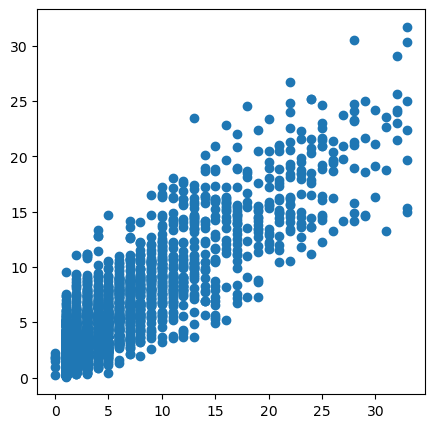

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

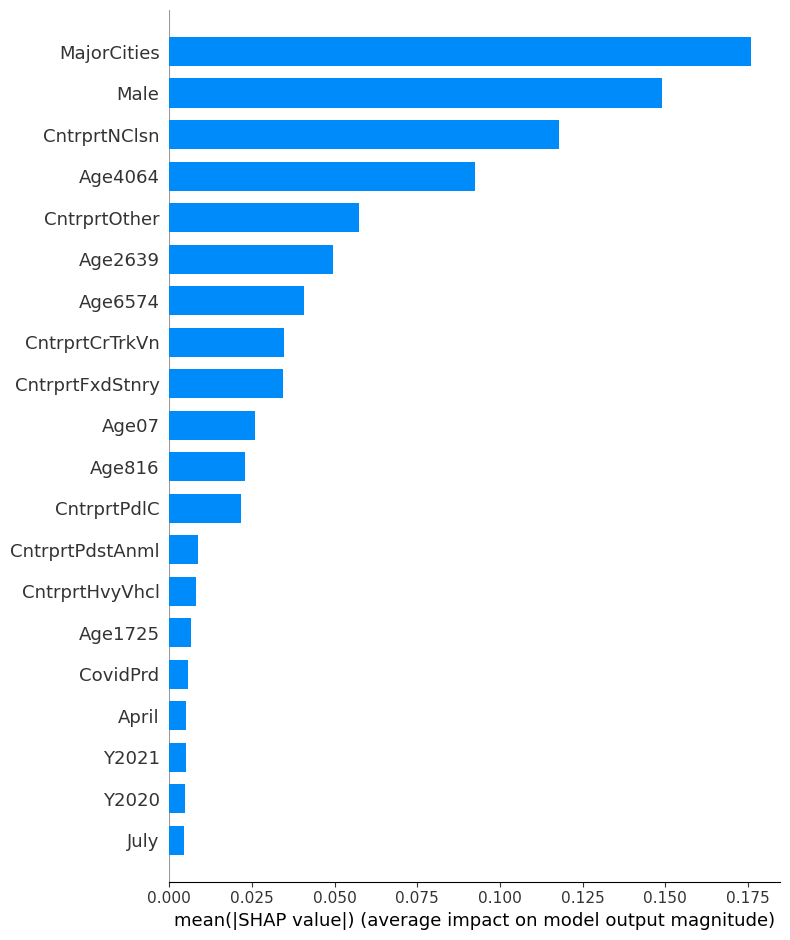

In [26]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                         Feature  Mean SHAP Value
MajorCities          MajorCities         0.174982
Male                        Male         0.148654
CntrprtNClsn        CntrprtNClsn         0.112072
Age4064                  Age4064         0.091714
CntrprtOther        CntrprtOther         0.050540
Age2639                  Age2639         0.049699
Age6574                  Age6574         0.040854
CntrprtFxdStnry  CntrprtFxdStnry         0.036826
Age07                      Age07         0.026203
CntrprtPdlC          CntrprtPdlC         0.023311


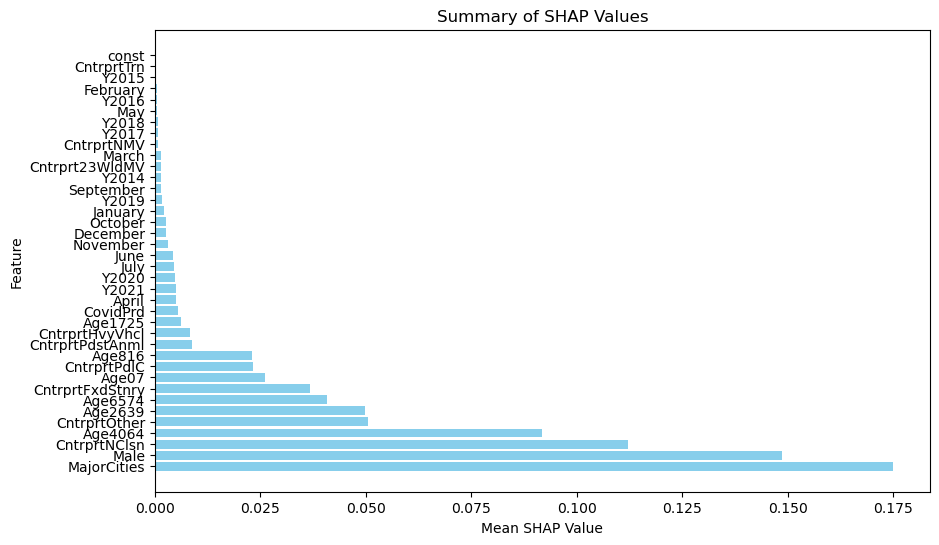

In [40]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


# Pedestrian REGRESION

In [41]:
filtered_data5 = data[data['Pedestrian'] == 1]


In [42]:
X = filtered_data5[['Age816','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Female',
                    
                   'MajorCities',
                    
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                    
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                    'CntrprtCrTrkVn',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtTrn','CntrprtNA',
                    
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021']]

y = filtered_data5['Hsptlsns']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 2.378532152910234
MAE: 1.5289721570462476
R^2: 0.8078850337328896


In [43]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 2.1523993783610402
MAE: 1.4267152695012268
R^2: 0.7846476883328598


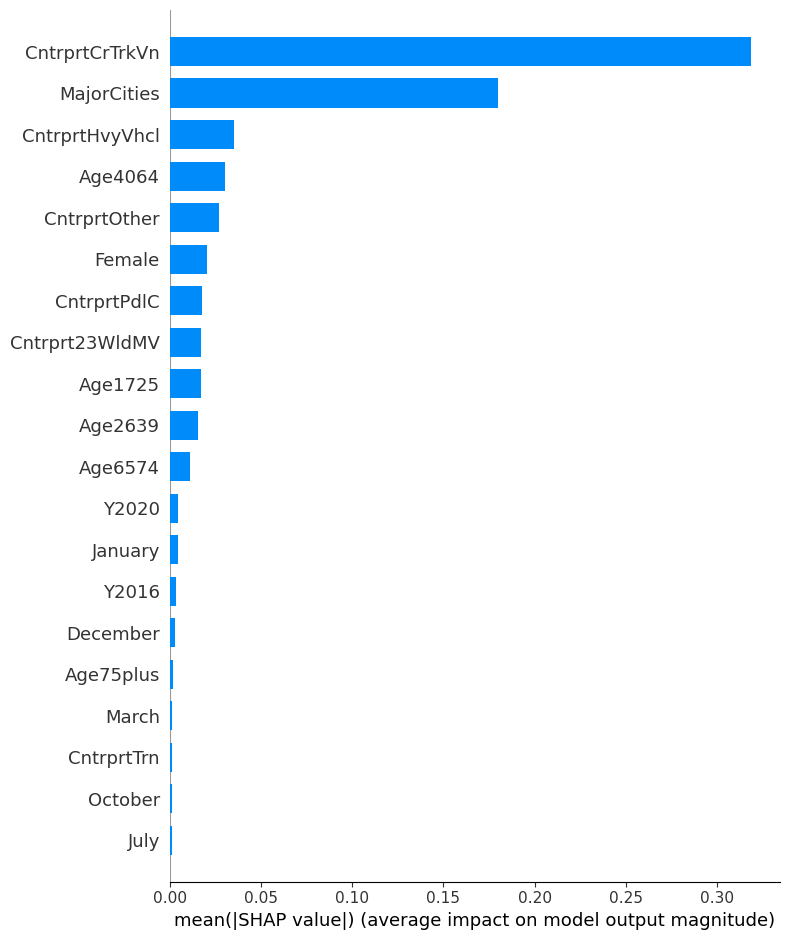

In [44]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                       Feature  Mean SHAP Value
CntrprtCrTrkVn  CntrprtCrTrkVn         0.318465
MajorCities        MajorCities         0.180122
CntrprtHvyVhcl  CntrprtHvyVhcl         0.035358
Age4064                Age4064         0.030521
CntrprtOther      CntrprtOther         0.027232
Female                  Female         0.020530
CntrprtPdlC        CntrprtPdlC         0.017698
Cntrprt23WldMV  Cntrprt23WldMV         0.017405
Age1725                Age1725         0.017050
Age2639                Age2639         0.015378


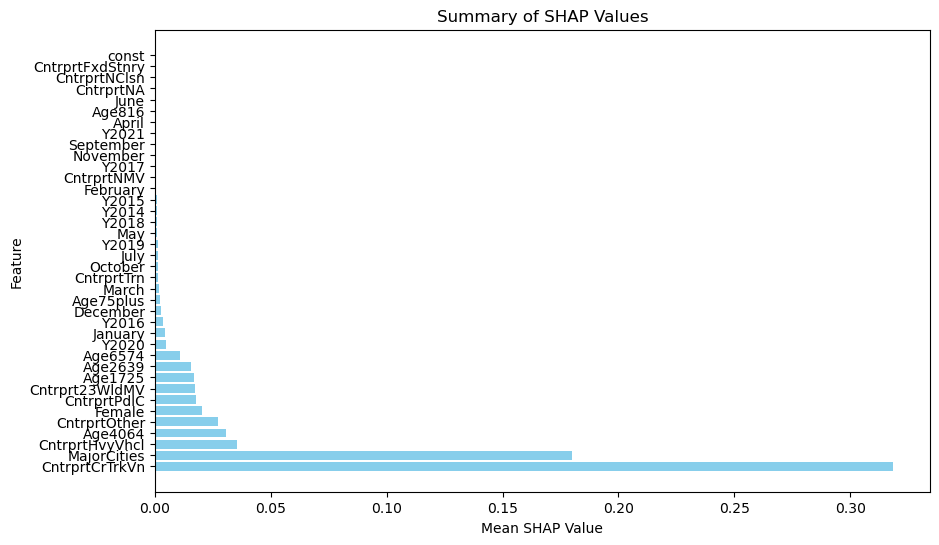

In [45]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


In [ ]:
|